In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_excel('/content/BA_AirlineReviews_CL_excel.xlsx',header=0)

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

In [8]:
from sklearn.impute import KNNImputer

numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object')].to_list()

impNumeric = KNNImputer(n_neighbors=5)
for col in numeric_missing_col:
    numeric = data[[col]].values
    impNumeric = impNumeric.fit(numeric)
    numeric = impNumeric.transform(numeric)
    numeric = numeric.round()
    data[col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                   0
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

In [9]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
for col in nominal_missing_col:
    data[col].fillna("Unknown", inplace=True)

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

lbenc = LabelEncoder()
for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate"
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
0,0,0.0,483,1590,595,1,25,1044,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2.0,1128,254,595,1,1649,143,1.698797e+18,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,5.0,264,1660,406,0,372,824,1.698797e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,37,2009,406,1,28,946,1.669853e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.0,222,1013,295,0,3603,976,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
data.describe()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3.701000e+03,3701.000000,...,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.00000,3701.000000,3701.000000,3701.000000
mean,1850.000000,3.627668,1665.487166,1396.319643,905.066739,0.311537,1845.307755,924.593083,-7.329317e+17,2.879222,...,0.173196,0.270197,0.107539,0.240746,0.208322,0.323696,0.52067,0.057552,0.097541,0.000540
std,1068.531001,3.094761,869.403991,838.782534,527.062164,0.463184,1065.214398,468.600891,4.381454e+18,1.340735,...,0.378468,0.444122,0.309839,0.427594,0.406163,0.467949,0.49964,0.232926,0.296733,0.023243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,925.000000,1.000000,897.000000,655.000000,457.000000,0.000000,923.000000,563.000000,1.438387e+18,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1850.000000,3.000000,1804.000000,1354.000000,888.000000,0.000000,1847.000000,962.000000,1.483229e+18,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,2775.000000,6.000000,2609.000000,2136.000000,1373.000000,1.000000,2767.000000,1454.000000,1.551398e+18,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,3700.000000,9.000000,2684.000000,2901.000000,1819.000000,1.000000,3691.000000,1542.000000,1.698797e+18,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [12]:
data.drop(['id', 'Name', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft', 'DateFlown', 'Datetime'], inplace=True, axis = 1)
data.columns.to_list()

['Satisfaction',
 'VerifiedReview',
 'SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Recommended',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity',
 'TypeOfTraveller_Business',
 'TypeOfTraveller_Couple Leisure',
 'TypeOfTraveller_Family Leisure',
 'TypeOfTraveller_Solo Leisure',
 'TypeOfTraveller_Unknown',
 'SeatType_Business Class',
 'SeatType_Economy Class',
 'SeatType_First Class',
 'SeatType_Premium Economy',
 'SeatType_Unknown']

In [13]:
from sklearn.model_selection import train_test_split

features = data.drop(['Satisfaction'], axis=1)
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42, stratify=label, shuffle=True)

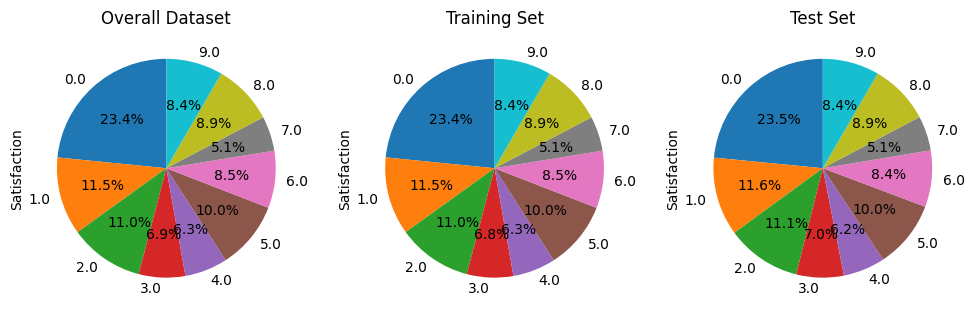

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

sorted_train = s_train['Satisfaction'].value_counts().sort_index()
sorted_test = s_test['Satisfaction'].value_counts().sort_index()
sorted_data = data['Satisfaction'].value_counts().sort_index()

# Create a pie chart for the overall dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 2)
plt.title('Training Set')
sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 3)
plt.title('Test Set')
sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 1)
plt.title('Overall Dataset')
sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,-0.053196,-0.042544,-0.055706,-0.094923,-0.072955,0.000019,0.060171,0.065903,0.078334,0.040597,0.076577,0.157712,-0.341139,0.023674,0.016246,-0.039935,-0.032269,-0.016451
1,-0.053196,1.000000,0.594581,0.476571,0.680494,0.641432,0.581483,0.437649,0.235556,-0.130733,-0.050030,-0.013271,0.052451,0.129975,0.020035,-0.105862,0.146022,0.035192,-0.034311
2,-0.042544,0.594581,1.000000,0.462598,0.645761,0.649522,0.663100,0.359542,0.218784,-0.121094,-0.015043,-0.008890,0.026215,0.106949,0.099310,-0.122863,0.110052,-0.036092,-0.004066
3,-0.055706,0.476571,0.462598,1.000000,0.591288,0.553304,0.396400,0.258803,0.218779,-0.131688,0.009200,-0.022326,0.059440,0.065211,0.058713,-0.091635,0.054343,0.020390,-0.015922
4,-0.094923,0.680494,0.645761,0.591288,1.000000,0.799057,0.644759,0.389409,0.211914,-0.179549,-0.053717,-0.038004,0.038518,0.212387,0.037194,-0.059308,0.059412,-0.003146,-0.028076
5,-0.072955,0.641432,0.649522,0.553304,0.799057,1.000000,0.650527,0.394026,0.211953,-0.171770,-0.050867,-0.020437,0.048071,0.178671,0.075868,-0.087849,0.038319,-0.000280,-0.020242
6,0.000019,0.581483,0.663100,0.396400,0.644759,0.650527,1.000000,0.452487,0.242445,-0.139504,-0.026110,-0.022162,0.038569,0.133114,0.105001,-0.132810,0.089439,-0.011279,-0.013350
7,0.060171,0.437649,0.359542,0.258803,0.389409,0.394026,0.452487,1.000000,0.321332,-0.071616,0.036818,0.011061,0.068508,-0.055329,0.015413,-0.049379,0.067047,0.006732,-0.005325
8,0.065903,0.235556,0.218784,0.218779,0.211914,0.211953,0.242445,0.321332,1.000000,-0.036935,-0.004702,0.026599,-0.001429,0.020382,0.049410,-0.054080,-0.009725,0.020665,0.000974
9,0.078334,-0.130733,-0.121094,-0.131688,-0.179549,-0.171770,-0.139504,-0.071616,-0.036935,1.000000,-0.276494,-0.155063,-0.253058,-0.229964,0.119343,-0.097501,0.003640,-0.026426,-0.010987


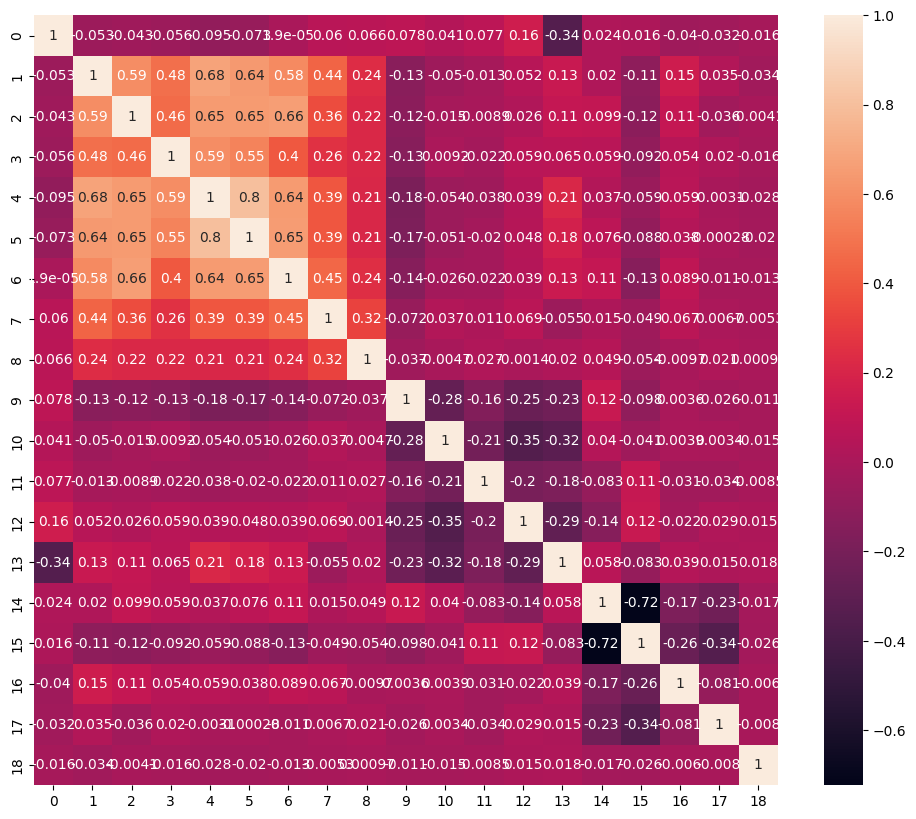

In [16]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


# Developing model

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


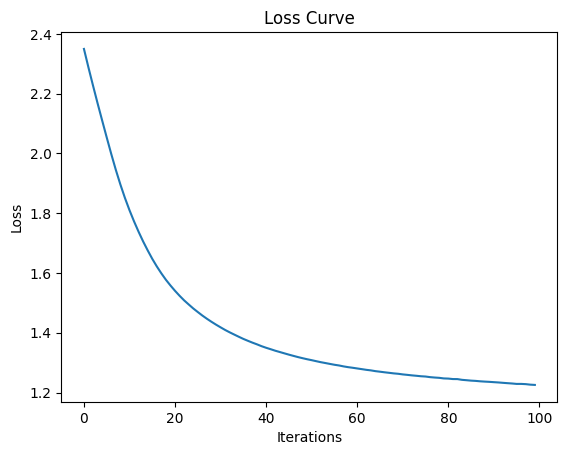

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=100, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
mlp.fit(x_train, y_train)
predict = mlp.predict(x_test)

plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [20]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

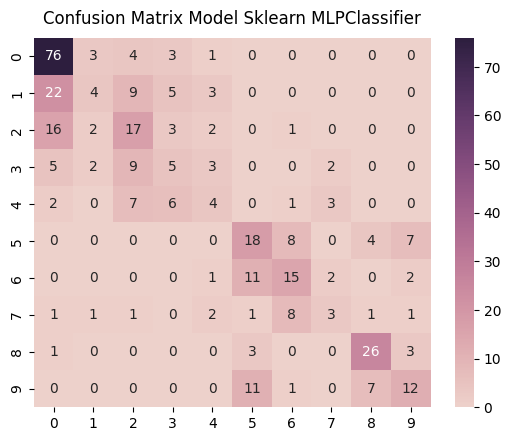

              precision    recall  f1-score     support
0.0            0.617886  0.873563  0.723810   87.000000
1.0            0.333333  0.093023  0.145455   43.000000
2.0            0.361702  0.414634  0.386364   41.000000
3.0            0.227273  0.192308  0.208333   26.000000
4.0            0.250000  0.173913  0.205128   23.000000
5.0            0.409091  0.486486  0.444444   37.000000
6.0            0.441176  0.483871  0.461538   31.000000
7.0            0.300000  0.157895  0.206897   19.000000
8.0            0.684211  0.787879  0.732394   33.000000
9.0            0.480000  0.387097  0.428571   31.000000
accuracy       0.485175  0.485175  0.485175    0.485175
macro avg      0.410467  0.405067  0.394293  371.000000
weighted avg   0.448922  0.485175  0.451050  371.000000
Mean Squared Error:  2.8274932614555257


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

confussion_matrix = confusion_matrix(y_test, predict)
plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

model1_report = classification_report(y_test, predict, output_dict=True)
print(pd.DataFrame(model1_report).transpose())

print("Mean Squared Error: ", mean_squared_error(y_test, predict))

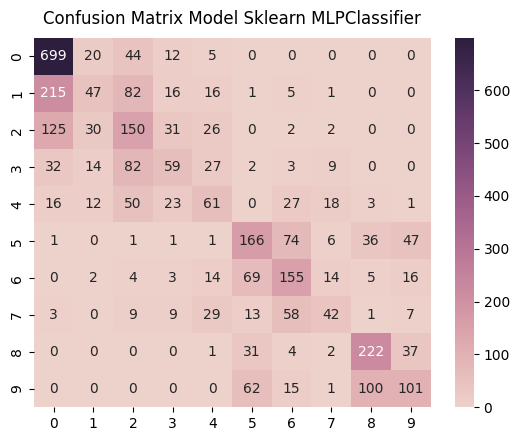

              precision    recall  f1-score      support
0.0            0.640697  0.896154  0.747194   780.000000
1.0            0.376000  0.122715  0.185039   383.000000
2.0            0.355450  0.409836  0.380711   366.000000
3.0            0.383117  0.258772  0.308901   228.000000
4.0            0.338889  0.289100  0.312020   211.000000
5.0            0.482558  0.498498  0.490399   333.000000
6.0            0.451895  0.549645  0.496000   282.000000
7.0            0.442105  0.245614  0.315789   171.000000
8.0            0.604905  0.747475  0.668675   297.000000
9.0            0.483254  0.362007  0.413934   279.000000
accuracy       0.511111  0.511111  0.511111     0.511111
macro avg      0.455887  0.437982  0.431866  3330.000000
weighted avg   0.483758  0.511111  0.480644  3330.000000
Mean Squared Error:  2.260960960960961


In [22]:
predict = mlp.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True)
print(pd.DataFrame(model_report).transpose())

print("Mean Squared Error: ", mean_squared_error(y_train, predict))

# Experiments

## Epoch 10

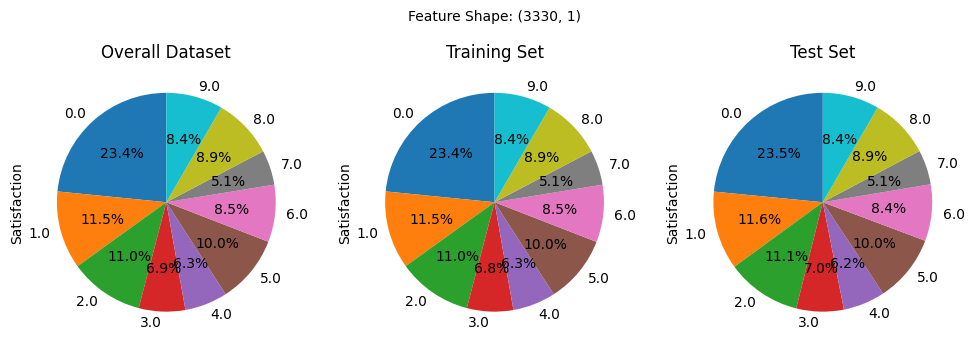

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


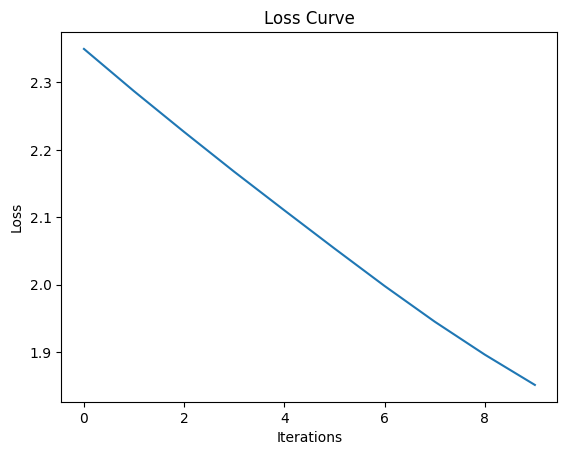

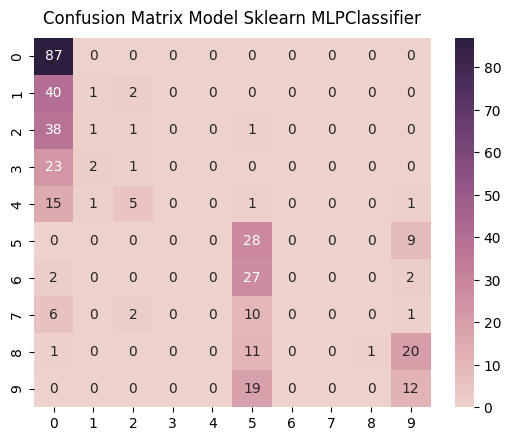

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score     support
0.0            0.410377  1.000000  0.581940   87.000000
1.0            0.200000  0.023256  0.041667   43.000000
2.0            0.090909  0.024390  0.038462   41.000000
3.0            0.000000  0.000000  0.000000   26.000000
4.0            0.000000  0.000000  0.000000   23.000000
5.0            0.288660  0.756757  0.417910   37.000000
6.0            0.000000  0.000000  0.000000   31.000000
7.0            0.000000  0.000000  0.000000   19.000000
8.0            1.000000  0.030303  0.058824   33.000000
9.0            0.266667  0.387097  0.315789   31.000000
accuracy       0.350404  0.350404  0.350404    0.350404
macro avg      0.225661  0.222180  0.145459  371.000000
weighted avg   0.269480  0.350404  0.218843  371.000000
Mean Squared Error:  4.989218328840971


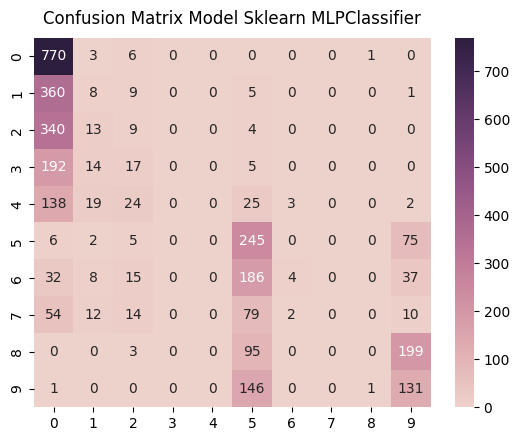

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score     support
0.0            0.406762  0.987179  0.576132   780.00000
1.0            0.101266  0.020888  0.034632   383.00000
2.0            0.088235  0.024590  0.038462   366.00000
3.0            0.000000  0.000000  0.000000   228.00000
4.0            0.000000  0.000000  0.000000   211.00000
5.0            0.310127  0.735736  0.436331   333.00000
6.0            0.444444  0.014184  0.027491   282.00000
7.0            0.000000  0.000000  0.000000   171.00000
8.0            0.000000  0.000000  0.000000   297.00000
9.0            0.287912  0.469534  0.356948   279.00000
accuracy       0.350450  0.350450  0.350450     0.35045
macro avg      0.163875  0.225211  0.147000  3330.00000
weighted avg   0.209395  0.350450  0.219028  3330.00000
Mean Squared Error:  5.195195195195195


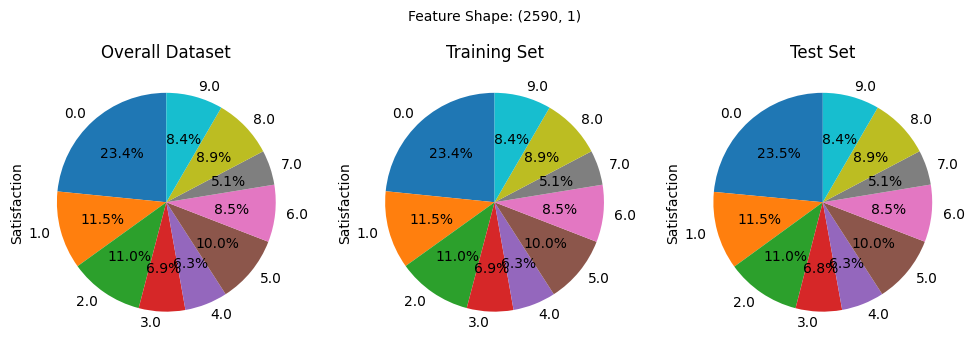

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


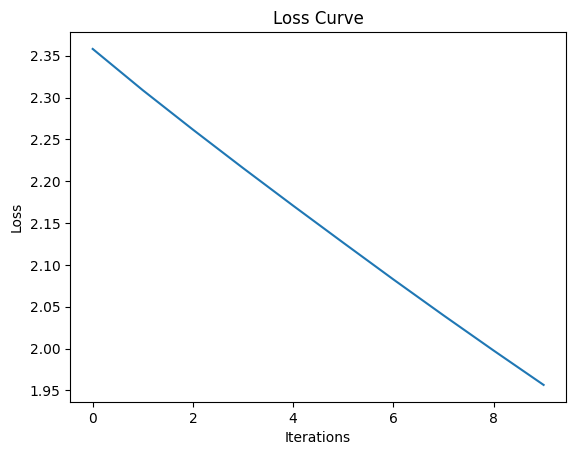

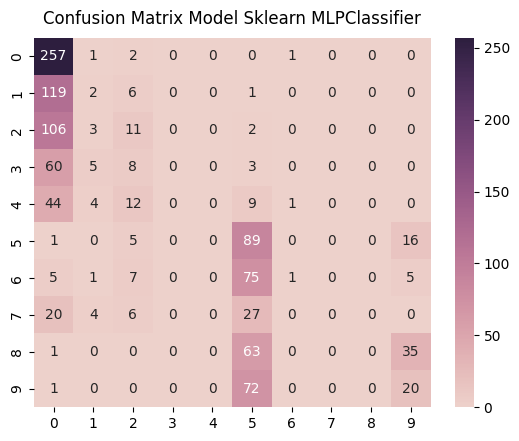

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
0.0            0.418567  0.984674  0.587429   261.000000
1.0            0.100000  0.015625  0.027027   128.000000
2.0            0.192982  0.090164  0.122905   122.000000
3.0            0.000000  0.000000  0.000000    76.000000
4.0            0.000000  0.000000  0.000000    70.000000
5.0            0.260997  0.801802  0.393805   111.000000
6.0            0.333333  0.010638  0.020619    94.000000
7.0            0.000000  0.000000  0.000000    57.000000
8.0            0.000000  0.000000  0.000000    99.000000
9.0            0.263158  0.215054  0.236686    93.000000
accuracy       0.342034  0.342034  0.342034     0.342034
macro avg      0.156904  0.211796  0.138847  1111.000000
weighted avg   0.207351  0.342034  0.215513  1111.000000
Mean Squared Error:  5.450945094509451


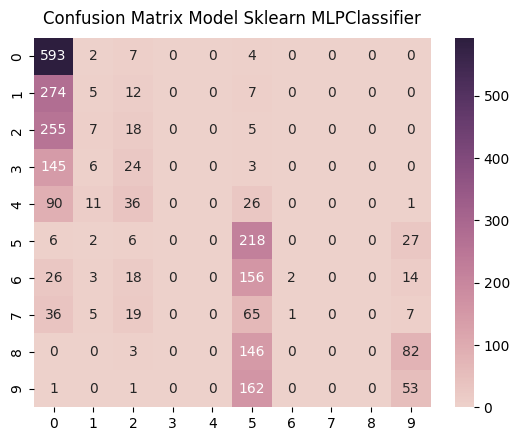

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
0.0            0.415849  0.978548  0.583661   606.000000
1.0            0.121951  0.016779  0.029499   298.000000
2.0            0.125000  0.063158  0.083916   285.000000
3.0            0.000000  0.000000  0.000000   178.000000
4.0            0.000000  0.000000  0.000000   164.000000
5.0            0.275253  0.841699  0.414843   259.000000
6.0            0.666667  0.009132  0.018018   219.000000
7.0            0.000000  0.000000  0.000000   133.000000
8.0            0.000000  0.000000  0.000000   231.000000
9.0            0.288043  0.244240  0.264339   217.000000
accuracy       0.343243  0.343243  0.343243     0.343243
macro avg      0.189276  0.215356  0.139428  2590.000000
weighted avg   0.233114  0.343243  0.214346  2590.000000
Mean Squared Error:  5.35984555984556


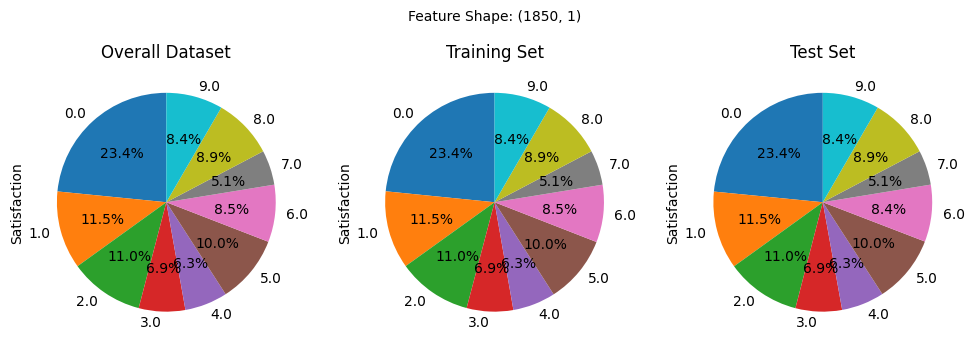

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


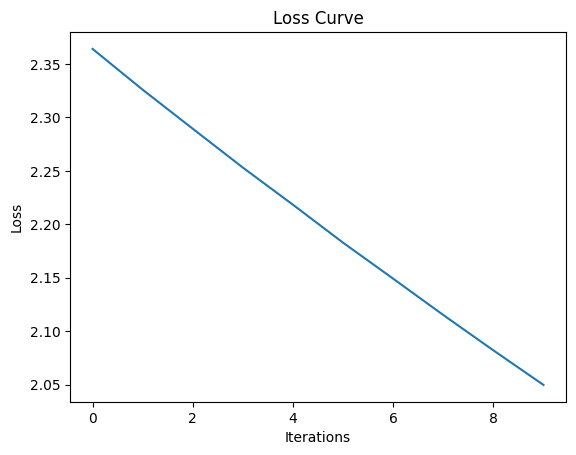

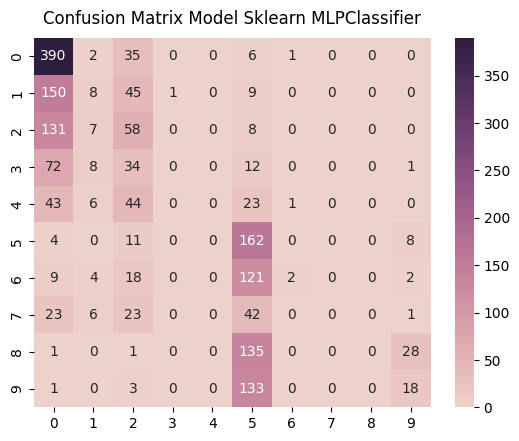

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
0.0            0.473301  0.898618  0.620032   434.000000
1.0            0.195122  0.037559  0.062992   213.000000
2.0            0.213235  0.284314  0.243697   204.000000
3.0            0.000000  0.000000  0.000000   127.000000
4.0            0.000000  0.000000  0.000000   117.000000
5.0            0.248848  0.875676  0.387560   185.000000
6.0            0.500000  0.012821  0.025000   156.000000
7.0            0.000000  0.000000  0.000000    95.000000
8.0            0.000000  0.000000  0.000000   165.000000
9.0            0.310345  0.116129  0.169014   155.000000
accuracy       0.344679  0.344679  0.344679     0.344679
macro avg      0.194085  0.222512  0.150830  1851.000000
weighted avg   0.249926  0.344679  0.234479  1851.000000
Mean Squared Error:  5.393841166936791


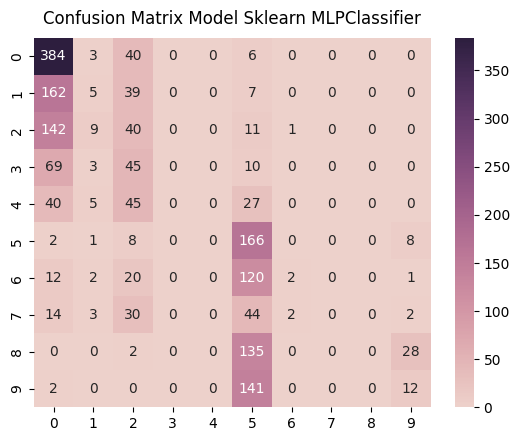

              precision    recall  f1-score      support
0.0            0.464329  0.886836  0.609524   433.000000
1.0            0.161290  0.023474  0.040984   213.000000
2.0            0.148699  0.197044  0.169492   203.000000
3.0            0.000000  0.000000  0.000000   127.000000
4.0            0.000000  0.000000  0.000000   117.000000
5.0            0.248876  0.897297  0.389671   185.000000
6.0            0.400000  0.012739  0.024691   157.000000
7.0            0.000000  0.000000  0.000000    95.000000
8.0            0.000000  0.000000  0.000000   165.000000
9.0            0.235294  0.077419  0.116505   155.000000
accuracy       0.329189  0.329189  0.329189     0.329189
macro avg      0.165849  0.209481  0.135087  1850.000000
weighted avg   0.222112  0.329189  0.216802  1850.000000
Mean Squared Error:  5.182702702702703


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)
    s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
    s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

    sorted_train = s_train['Satisfaction'].value_counts().sort_index()
    sorted_test = s_test['Satisfaction'].value_counts().sort_index()
    sorted_data = data['Satisfaction'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    #! edit mulai disini
    mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=10, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
    mlp.fit(x_train, y_train)
    #! sampe sini

    plt.plot(mlp.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    predict = mlp.predict(x_test)
    confussion_matrix = confusion_matrix(y_test, predict)
    plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

    model1_report = classification_report(y_test, predict, output_dict=True)
    print(pd.DataFrame(model1_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_test, predict))

    predict = mlp.predict(x_train)
    confusion_matrix_result = confusion_matrix(y_train, predict)
    plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

    model_report = classification_report(y_train, predict, output_dict=True)
    print(pd.DataFrame(model_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_train, predict))



## Epoch 50

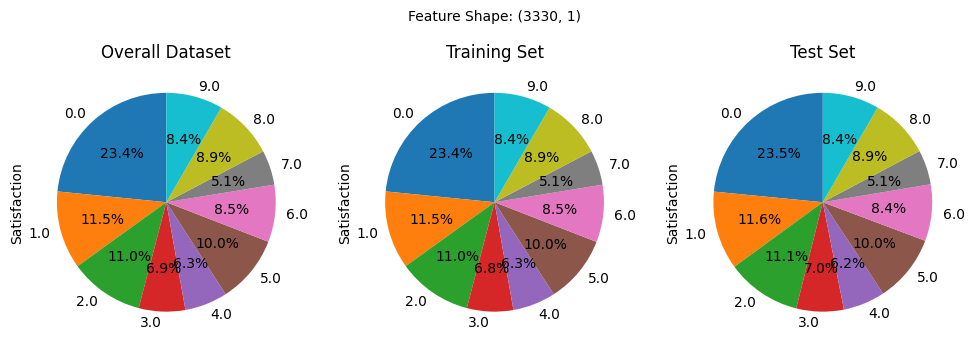

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


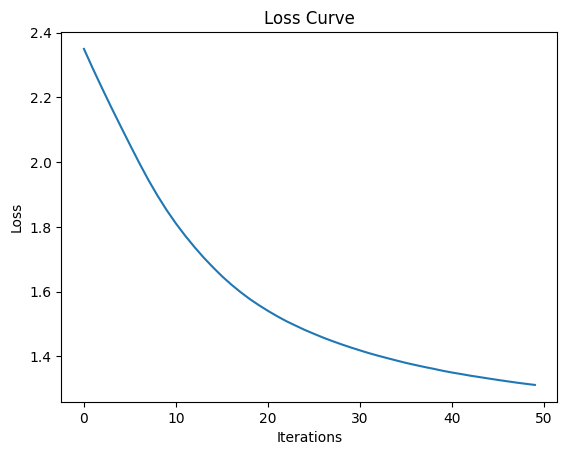

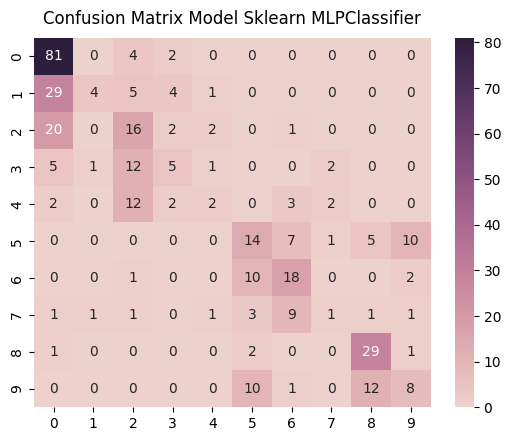

              precision    recall  f1-score     support
0.0            0.582734  0.931034  0.716814   87.000000
1.0            0.666667  0.093023  0.163265   43.000000
2.0            0.313725  0.390244  0.347826   41.000000
3.0            0.333333  0.192308  0.243902   26.000000
4.0            0.285714  0.086957  0.133333   23.000000
5.0            0.358974  0.378378  0.368421   37.000000
6.0            0.461538  0.580645  0.514286   31.000000
7.0            0.166667  0.052632  0.080000   19.000000
8.0            0.617021  0.878788  0.725000   33.000000
9.0            0.363636  0.258065  0.301887   31.000000
accuracy       0.479784  0.479784  0.479784    0.479784
macro avg      0.415001  0.384207  0.359473  371.000000
weighted avg   0.457833  0.479784  0.424340  371.000000
Mean Squared Error:  2.894878706199461


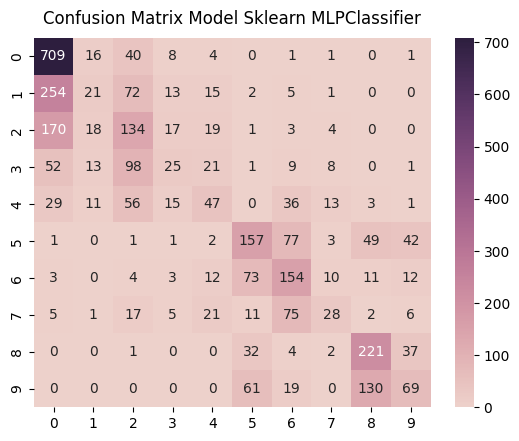

              precision    recall  f1-score     support
0.0            0.579722  0.908974  0.707938   780.00000
1.0            0.262500  0.054830  0.090713   383.00000
2.0            0.316785  0.366120  0.339670   366.00000
3.0            0.287356  0.109649  0.158730   228.00000
4.0            0.333333  0.222749  0.267045   211.00000
5.0            0.464497  0.471471  0.467958   333.00000
6.0            0.402089  0.546099  0.463158   282.00000
7.0            0.400000  0.163743  0.232365   171.00000
8.0            0.531250  0.744108  0.619916   297.00000
9.0            0.408284  0.247312  0.308036   279.00000
accuracy       0.469970  0.469970  0.469970     0.46997
macro avg      0.398582  0.383506  0.365553  3330.00000
weighted avg   0.424226  0.469970  0.420427  3330.00000
Mean Squared Error:  2.5993993993993993


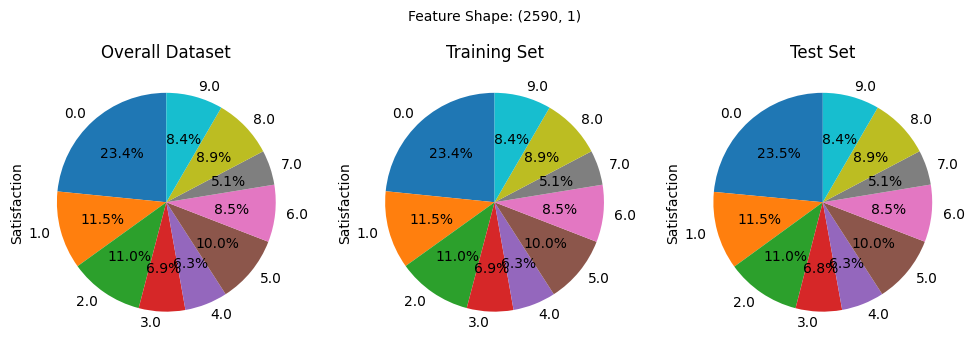

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


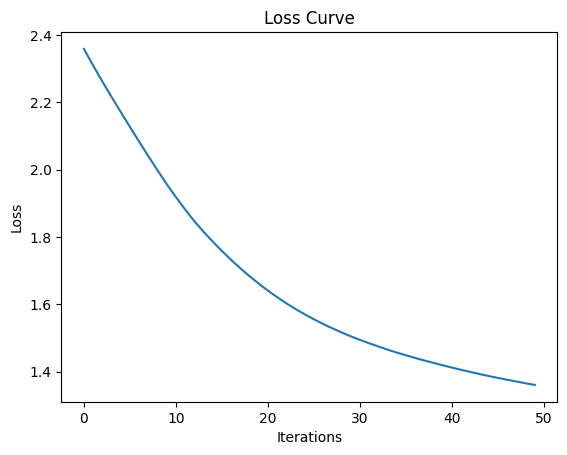

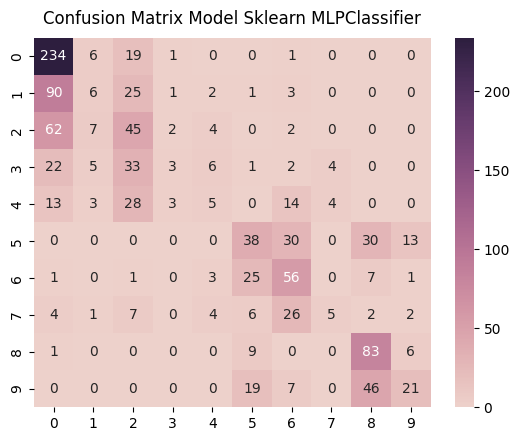

              precision    recall  f1-score      support
0.0            0.548009  0.896552  0.680233   261.000000
1.0            0.214286  0.046875  0.076923   128.000000
2.0            0.284810  0.368852  0.321429   122.000000
3.0            0.300000  0.039474  0.069767    76.000000
4.0            0.208333  0.071429  0.106383    70.000000
5.0            0.383838  0.342342  0.361905   111.000000
6.0            0.397163  0.595745  0.476596    94.000000
7.0            0.384615  0.087719  0.142857    57.000000
8.0            0.494048  0.838384  0.621723    99.000000
9.0            0.488372  0.225806  0.308824    93.000000
accuracy       0.446445  0.446445  0.446445     0.446445
macro avg      0.370348  0.351318  0.316664  1111.000000
weighted avg   0.394942  0.446445  0.380500  1111.000000
Mean Squared Error:  2.8316831683168315


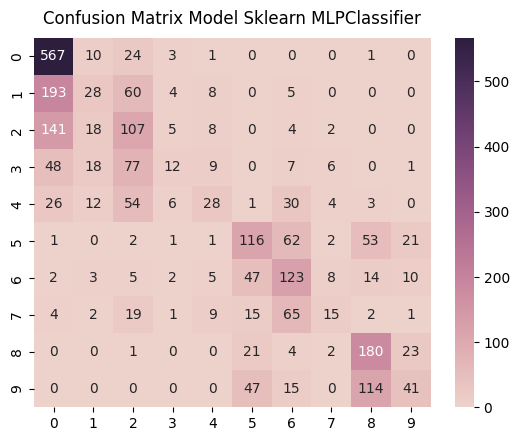

              precision    recall  f1-score      support
0.0            0.577393  0.935644  0.714106   606.000000
1.0            0.307692  0.093960  0.143959   298.000000
2.0            0.306590  0.375439  0.337539   285.000000
3.0            0.352941  0.067416  0.113208   178.000000
4.0            0.405797  0.170732  0.240343   164.000000
5.0            0.469636  0.447876  0.458498   259.000000
6.0            0.390476  0.561644  0.460674   219.000000
7.0            0.384615  0.112782  0.174419   133.000000
8.0            0.490463  0.779221  0.602007   231.000000
9.0            0.422680  0.188940  0.261146   217.000000
accuracy       0.469884  0.469884  0.469884     0.469884
macro avg      0.410828  0.373365  0.350590  2590.000000
weighted avg   0.433076  0.469884  0.413121  2590.000000
Mean Squared Error:  2.618918918918919


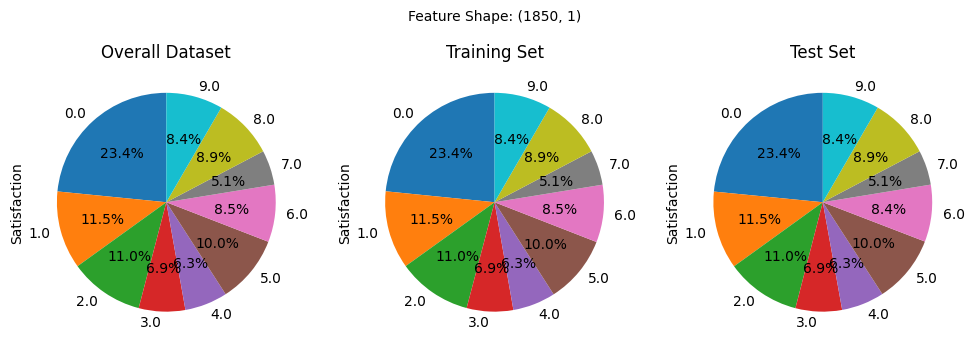

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


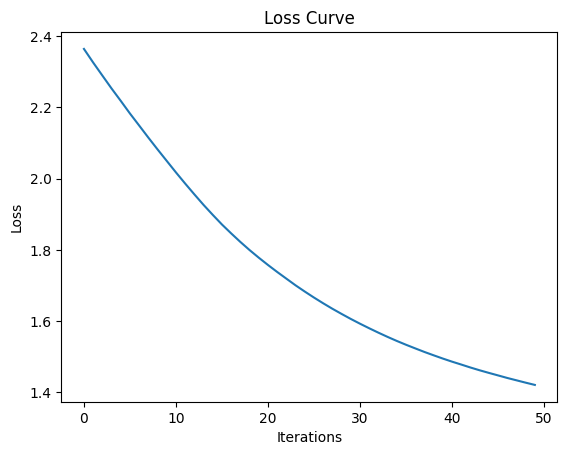

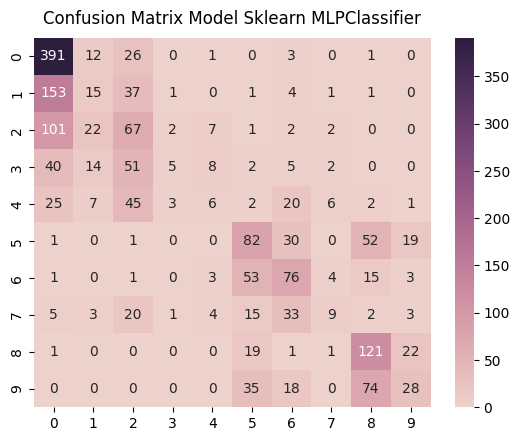

              precision    recall  f1-score      support
0.0            0.544568  0.900922  0.678819   434.000000
1.0            0.205479  0.070423  0.104895   213.000000
2.0            0.270161  0.328431  0.296460   204.000000
3.0            0.416667  0.039370  0.071942   127.000000
4.0            0.206897  0.051282  0.082192   117.000000
5.0            0.390476  0.443243  0.415190   185.000000
6.0            0.395833  0.487179  0.436782   156.000000
7.0            0.360000  0.094737  0.150000    95.000000
8.0            0.451493  0.733333  0.558891   165.000000
9.0            0.368421  0.180645  0.242424   155.000000
accuracy       0.432199  0.432199  0.432199     0.432199
macro avg      0.361000  0.332957  0.303760  1851.000000
weighted avg   0.384730  0.432199  0.370163  1851.000000
Mean Squared Error:  3.1112911939492167


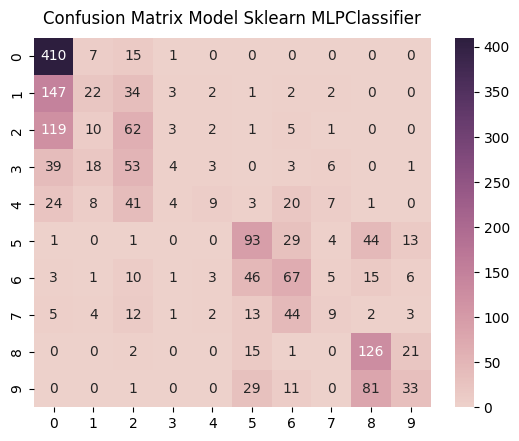

              precision    recall  f1-score      support
0.0            0.548128  0.946882  0.694327   433.000000
1.0            0.314286  0.103286  0.155477   213.000000
2.0            0.268398  0.305419  0.285714   203.000000
3.0            0.235294  0.031496  0.055556   127.000000
4.0            0.428571  0.076923  0.130435   117.000000
5.0            0.462687  0.502703  0.481865   185.000000
6.0            0.368132  0.426752  0.395280   157.000000
7.0            0.264706  0.094737  0.139535    95.000000
8.0            0.468401  0.763636  0.580645   165.000000
9.0            0.428571  0.212903  0.284483   155.000000
accuracy       0.451351  0.451351  0.451351     0.451351
macro avg      0.378718  0.346474  0.320332  1850.000000
weighted avg   0.405972  0.451351  0.388345  1850.000000
Mean Squared Error:  2.908108108108108


In [24]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)
    s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
    s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

    sorted_train = s_train['Satisfaction'].value_counts().sort_index()
    sorted_test = s_test['Satisfaction'].value_counts().sort_index()
    sorted_data = data['Satisfaction'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    #! edit mulai disini
    mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=50, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
    mlp.fit(x_train, y_train)
    #! sampe sini

    plt.plot(mlp.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    predict = mlp.predict(x_test)
    confussion_matrix = confusion_matrix(y_test, predict)
    plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

    model1_report = classification_report(y_test, predict, output_dict=True)
    print(pd.DataFrame(model1_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_test, predict))

    predict = mlp.predict(x_train)
    confusion_matrix_result = confusion_matrix(y_train, predict)
    plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

    model_report = classification_report(y_train, predict, output_dict=True)
    print(pd.DataFrame(model_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_train, predict))



## Epoch 100

akurasi  terbaik ada di konfigurasi 1 dengan train 51% dan test 48%

test

            precision    recall  f1-score     support
    0.0            0.617886  0.873563  0.723810   87.000000
    1.0            0.333333  0.093023  0.145455   43.000000
    2.0            0.361702  0.414634  0.386364   41.000000
    3.0            0.227273  0.192308  0.208333   26.000000
    4.0            0.250000  0.173913  0.205128   23.000000
    5.0            0.409091  0.486486  0.444444   37.000000
    6.0            0.441176  0.483871  0.461538   31.000000
    7.0            0.300000  0.157895  0.206897   19.000000
    8.0            0.684211  0.787879  0.732394   33.000000
    9.0            0.480000  0.387097  0.428571   31.000000
    accuracy       0.485175  0.485175  0.485175    0.485175
    macro avg      0.410467  0.405067  0.394293  371.000000
    weighted avg   0.448922  0.485175  0.451050  371.000000
    Mean Squared Error:  2.8274932614555257


train

            precision    recall  f1-score      support
    0.0            0.640697  0.896154  0.747194   780.000000
    1.0            0.376000  0.122715  0.185039   383.000000
    2.0            0.355450  0.409836  0.380711   366.000000
    3.0            0.383117  0.258772  0.308901   228.000000
    4.0            0.338889  0.289100  0.312020   211.000000
    5.0            0.482558  0.498498  0.490399   333.000000
    6.0            0.451895  0.549645  0.496000   282.000000
    7.0            0.442105  0.245614  0.315789   171.000000
    8.0            0.604905  0.747475  0.668675   297.000000
    9.0            0.483254  0.362007  0.413934   279.000000
    accuracy       0.511111  0.511111  0.511111     0.511111
    macro avg      0.455887  0.437982  0.431866  3330.000000
    weighted avg   0.483758  0.511111  0.480644  3330.000000
    Mean Squared Error:  2.260960960960961

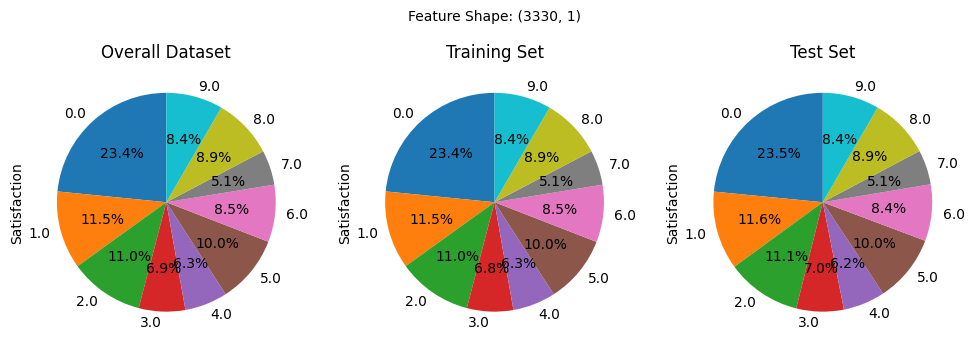

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


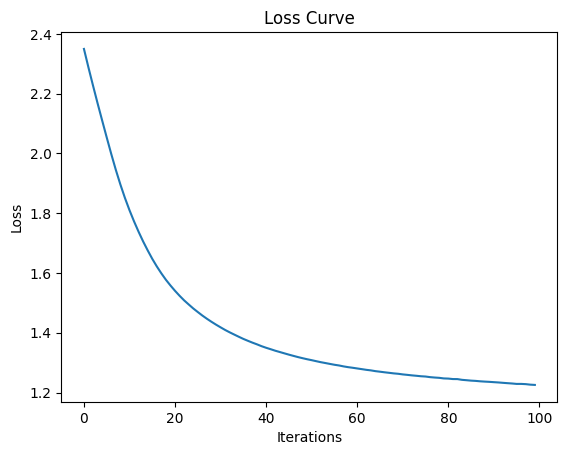

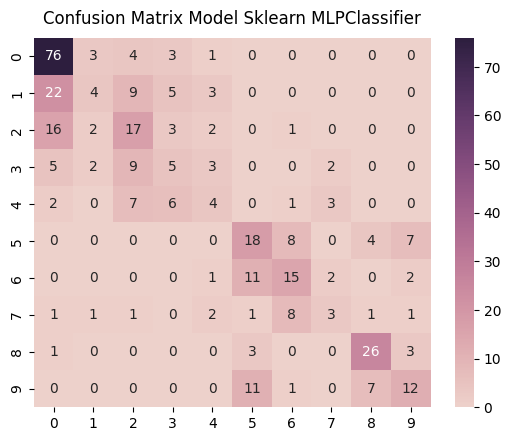

              precision    recall  f1-score     support
0.0            0.617886  0.873563  0.723810   87.000000
1.0            0.333333  0.093023  0.145455   43.000000
2.0            0.361702  0.414634  0.386364   41.000000
3.0            0.227273  0.192308  0.208333   26.000000
4.0            0.250000  0.173913  0.205128   23.000000
5.0            0.409091  0.486486  0.444444   37.000000
6.0            0.441176  0.483871  0.461538   31.000000
7.0            0.300000  0.157895  0.206897   19.000000
8.0            0.684211  0.787879  0.732394   33.000000
9.0            0.480000  0.387097  0.428571   31.000000
accuracy       0.485175  0.485175  0.485175    0.485175
macro avg      0.410467  0.405067  0.394293  371.000000
weighted avg   0.448922  0.485175  0.451050  371.000000
Mean Squared Error:  2.8274932614555257


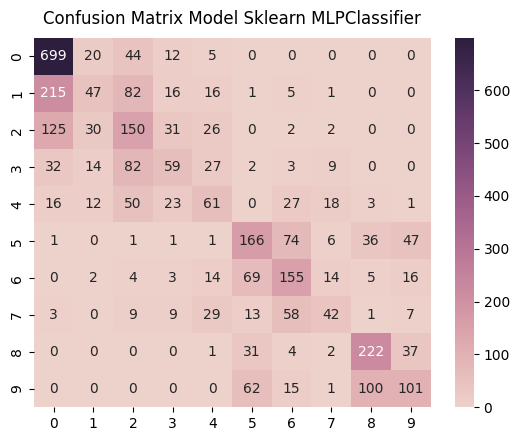

              precision    recall  f1-score      support
0.0            0.640697  0.896154  0.747194   780.000000
1.0            0.376000  0.122715  0.185039   383.000000
2.0            0.355450  0.409836  0.380711   366.000000
3.0            0.383117  0.258772  0.308901   228.000000
4.0            0.338889  0.289100  0.312020   211.000000
5.0            0.482558  0.498498  0.490399   333.000000
6.0            0.451895  0.549645  0.496000   282.000000
7.0            0.442105  0.245614  0.315789   171.000000
8.0            0.604905  0.747475  0.668675   297.000000
9.0            0.483254  0.362007  0.413934   279.000000
accuracy       0.511111  0.511111  0.511111     0.511111
macro avg      0.455887  0.437982  0.431866  3330.000000
weighted avg   0.483758  0.511111  0.480644  3330.000000
Mean Squared Error:  2.260960960960961


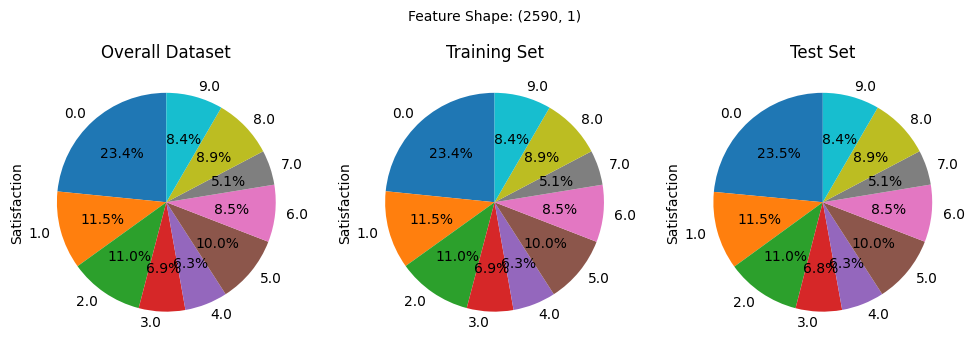

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


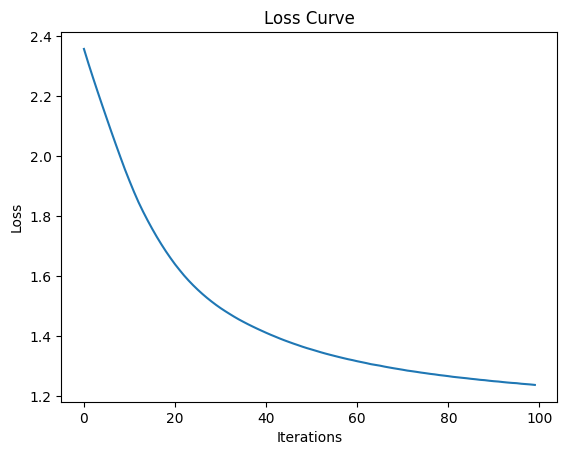

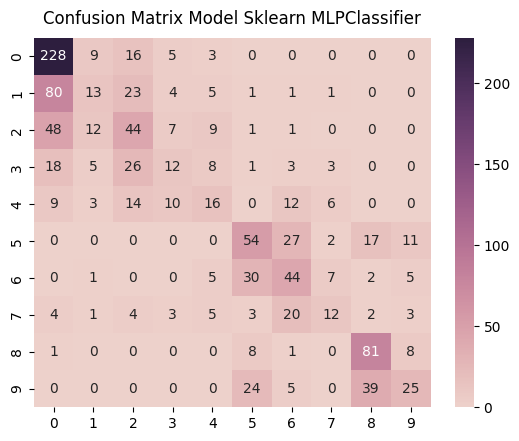

              precision    recall  f1-score      support
0.0            0.587629  0.873563  0.702619   261.000000
1.0            0.295455  0.101562  0.151163   128.000000
2.0            0.346457  0.360656  0.353414   122.000000
3.0            0.292683  0.157895  0.205128    76.000000
4.0            0.313725  0.228571  0.264463    70.000000
5.0            0.442623  0.486486  0.463519   111.000000
6.0            0.385965  0.468085  0.423077    94.000000
7.0            0.387097  0.210526  0.272727    57.000000
8.0            0.574468  0.818182  0.675000    99.000000
9.0            0.480769  0.268817  0.344828    93.000000
accuracy       0.476148  0.476148  0.476148     0.476148
macro avg      0.410687  0.397434  0.385594  1111.000000
weighted avg   0.438094  0.476148  0.437093  1111.000000
Mean Squared Error:  2.6093609360936094


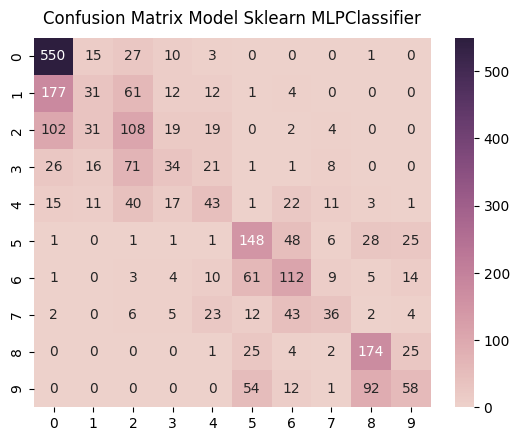

              precision    recall  f1-score      support
0.0            0.629291  0.907591  0.743243   606.000000
1.0            0.298077  0.104027  0.154229   298.000000
2.0            0.340694  0.378947  0.358804   285.000000
3.0            0.333333  0.191011  0.242857   178.000000
4.0            0.323308  0.262195  0.289562   164.000000
5.0            0.488449  0.571429  0.526690   259.000000
6.0            0.451613  0.511416  0.479657   219.000000
7.0            0.467532  0.270677  0.342857   133.000000
8.0            0.570492  0.753247  0.649254   231.000000
9.0            0.456693  0.267281  0.337209   217.000000
accuracy       0.499614  0.499614  0.499614     0.499614
macro avg      0.435948  0.421782  0.412436  2590.000000
weighted avg   0.462591  0.499614  0.463147  2590.000000
Mean Squared Error:  2.294980694980695


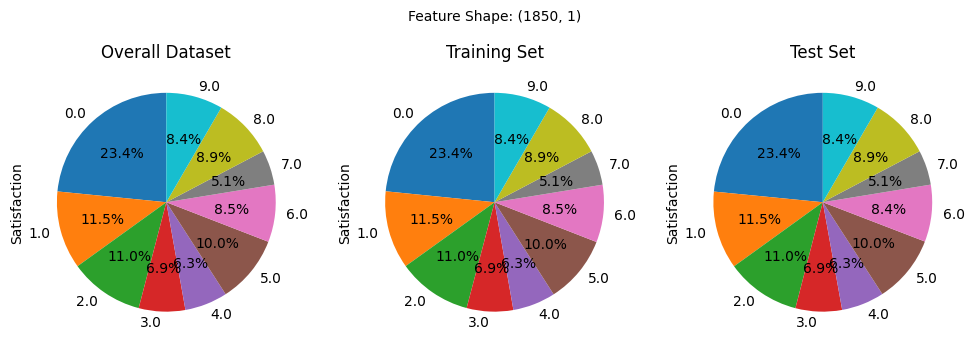

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


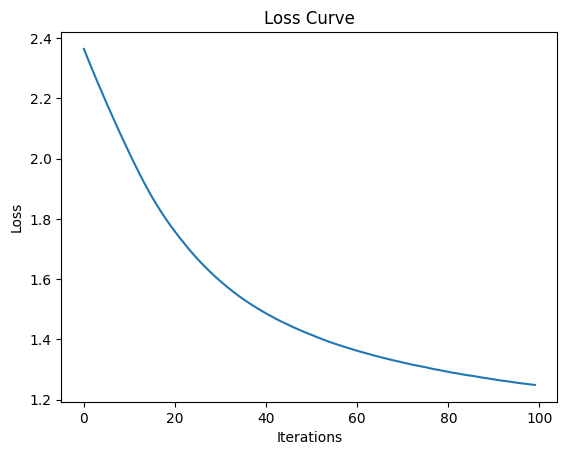

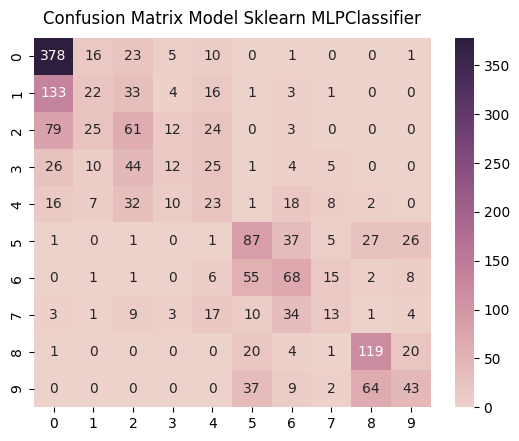

              precision    recall  f1-score      support
0.0            0.593407  0.870968  0.705882   434.000000
1.0            0.268293  0.103286  0.149153   213.000000
2.0            0.299020  0.299020  0.299020   204.000000
3.0            0.260870  0.094488  0.138728   127.000000
4.0            0.188525  0.196581  0.192469   117.000000
5.0            0.410377  0.470270  0.438287   185.000000
6.0            0.375691  0.435897  0.403561   156.000000
7.0            0.260000  0.136842  0.179310    95.000000
8.0            0.553488  0.721212  0.626316   165.000000
9.0            0.421569  0.277419  0.334630   155.000000
accuracy       0.446245  0.446245  0.446245     0.446245
macro avg      0.363124  0.360598  0.346736  1851.000000
weighted avg   0.403441  0.446245  0.408181  1851.000000
Mean Squared Error:  2.792544570502431


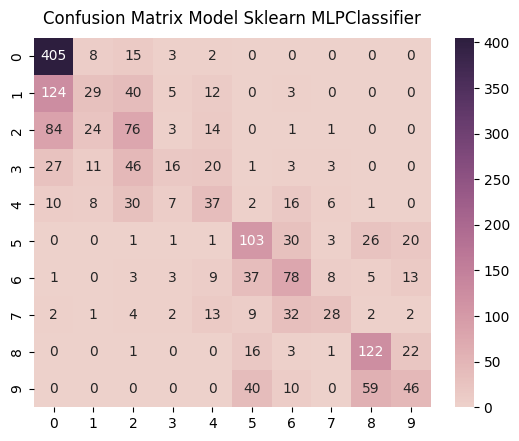

              precision    recall  f1-score      support
0.0            0.620214  0.935335  0.745856   433.000000
1.0            0.358025  0.136150  0.197279   213.000000
2.0            0.351852  0.374384  0.362768   203.000000
3.0            0.400000  0.125984  0.191617   127.000000
4.0            0.342593  0.316239  0.328889   117.000000
5.0            0.495192  0.556757  0.524173   185.000000
6.0            0.443182  0.496815  0.468468   157.000000
7.0            0.560000  0.294737  0.386207    95.000000
8.0            0.567442  0.739394  0.642105   165.000000
9.0            0.446602  0.296774  0.356589   155.000000
accuracy       0.508108  0.508108  0.508108     0.508108
macro avg      0.458510  0.427257  0.420395  1850.000000
weighted avg   0.478034  0.508108  0.470196  1850.000000
Mean Squared Error:  2.3162162162162163


In [25]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)
    s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
    s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

    sorted_train = s_train['Satisfaction'].value_counts().sort_index()
    sorted_test = s_test['Satisfaction'].value_counts().sort_index()
    sorted_data = data['Satisfaction'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    #! edit mulai disini
    mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=100, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
    mlp.fit(x_train, y_train)
    #! sampe sini

    plt.plot(mlp.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    predict = mlp.predict(x_test)
    confussion_matrix = confusion_matrix(y_test, predict)
    plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

    model1_report = classification_report(y_test, predict, output_dict=True)
    print(pd.DataFrame(model1_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_test, predict))

    predict = mlp.predict(x_train)
    confusion_matrix_result = confusion_matrix(y_train, predict)
    plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

    model_report = classification_report(y_train, predict, output_dict=True)
    print(pd.DataFrame(model_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_train, predict))



## Epoch 500

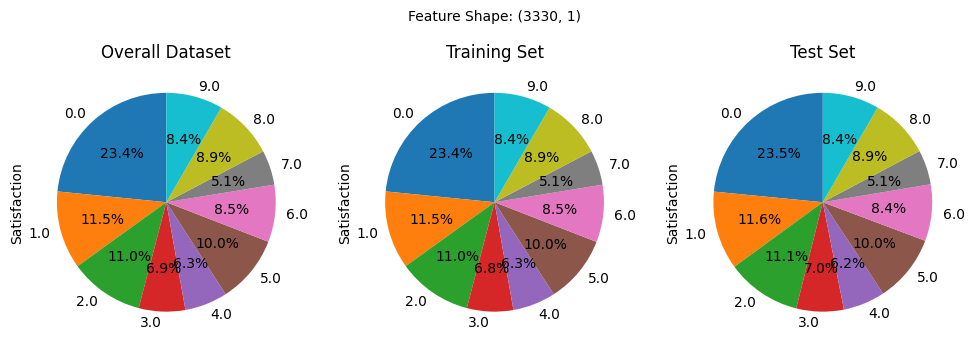

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


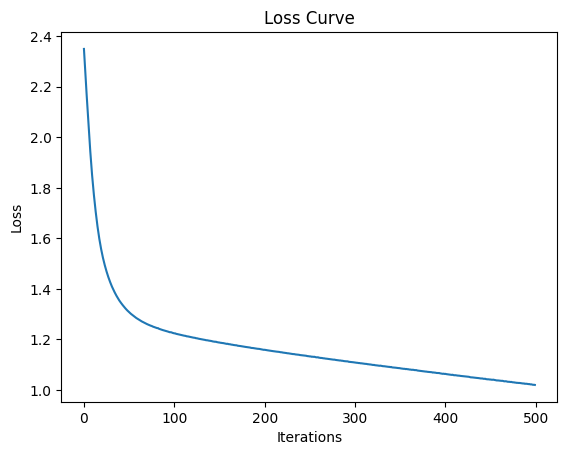

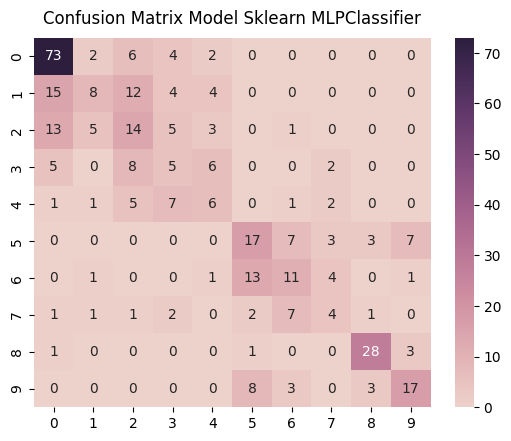

              precision    recall  f1-score     support
0.0            0.669725  0.839080  0.744898   87.000000
1.0            0.444444  0.186047  0.262295   43.000000
2.0            0.304348  0.341463  0.321839   41.000000
3.0            0.185185  0.192308  0.188679   26.000000
4.0            0.272727  0.260870  0.266667   23.000000
5.0            0.414634  0.459459  0.435897   37.000000
6.0            0.366667  0.354839  0.360656   31.000000
7.0            0.266667  0.210526  0.235294   19.000000
8.0            0.800000  0.848485  0.823529   33.000000
9.0            0.607143  0.548387  0.576271   31.000000
accuracy       0.493261  0.493261  0.493261    0.493261
macro avg      0.433154  0.424146  0.421603  371.000000
weighted avg   0.479620  0.493261  0.477464  371.000000
Mean Squared Error:  2.784366576819407


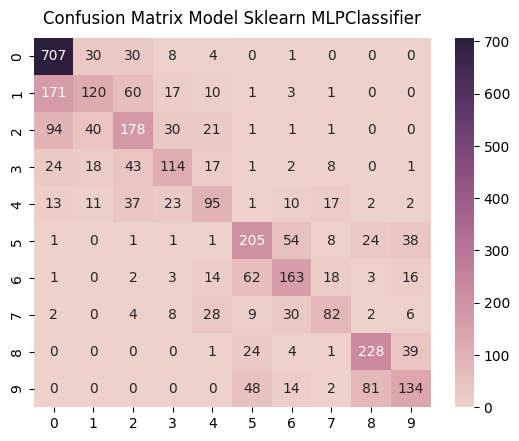

              precision    recall  f1-score      support
0.0            0.697927  0.906410  0.788622   780.000000
1.0            0.547945  0.313316  0.398671   383.000000
2.0            0.501408  0.486339  0.493759   366.000000
3.0            0.558824  0.500000  0.527778   228.000000
4.0            0.497382  0.450237  0.472637   211.000000
5.0            0.582386  0.615616  0.598540   333.000000
6.0            0.578014  0.578014  0.578014   282.000000
7.0            0.594203  0.479532  0.530744   171.000000
8.0            0.670588  0.767677  0.715856   297.000000
9.0            0.567797  0.480287  0.520388   279.000000
accuracy       0.608408  0.608408  0.608408     0.608408
macro avg      0.579647  0.557743  0.562501  3330.000000
weighted avg   0.596470  0.608408  0.594433  3330.000000
Mean Squared Error:  1.7966966966966966


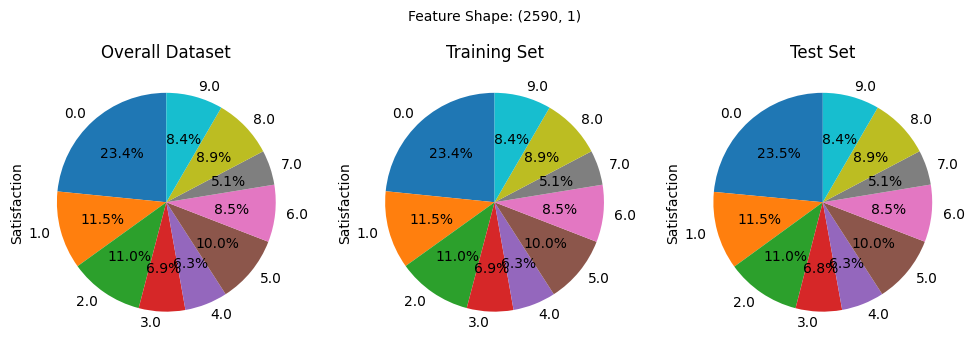

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


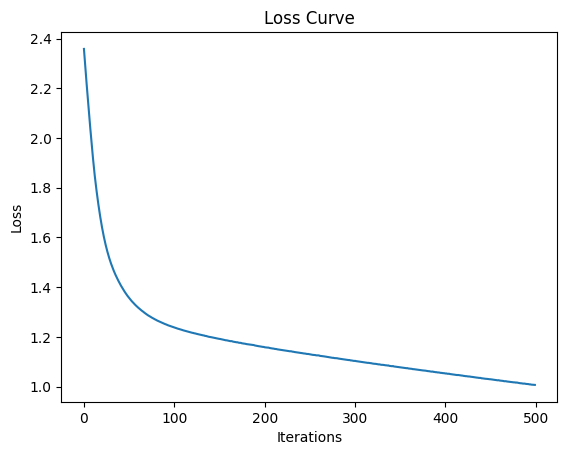

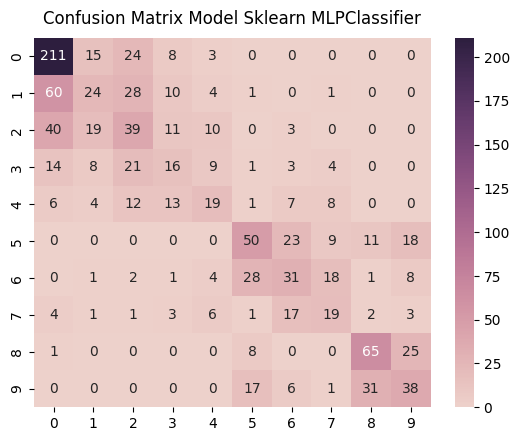

              precision    recall  f1-score      support
0.0            0.627976  0.808429  0.706868   261.000000
1.0            0.333333  0.187500  0.240000   128.000000
2.0            0.307087  0.319672  0.313253   122.000000
3.0            0.258065  0.210526  0.231884    76.000000
4.0            0.345455  0.271429  0.304000    70.000000
5.0            0.467290  0.450450  0.458716   111.000000
6.0            0.344444  0.329787  0.336957    94.000000
7.0            0.316667  0.333333  0.324786    57.000000
8.0            0.590909  0.656566  0.622010    99.000000
9.0            0.413043  0.408602  0.410811    93.000000
accuracy       0.460846  0.460846  0.460846     0.460846
macro avg      0.400427  0.397629  0.394928  1111.000000
weighted avg   0.438378  0.460846  0.443943  1111.000000
Mean Squared Error:  2.5814581458145813


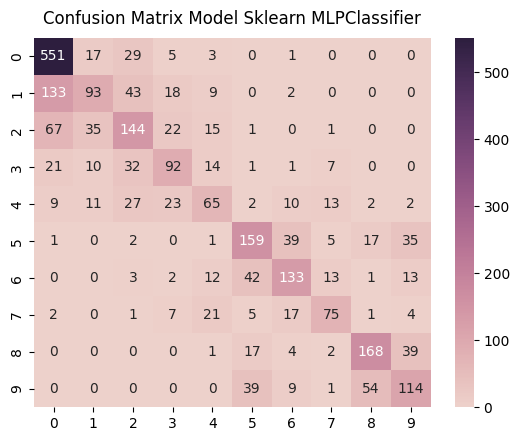

              precision    recall  f1-score      support
0.0            0.702806  0.909241  0.792806   606.000000
1.0            0.560241  0.312081  0.400862   298.000000
2.0            0.512456  0.505263  0.508834   285.000000
3.0            0.544379  0.516854  0.530259   178.000000
4.0            0.460993  0.396341  0.426230   164.000000
5.0            0.597744  0.613900  0.605714   259.000000
6.0            0.615741  0.607306  0.611494   219.000000
7.0            0.641026  0.563910  0.600000   133.000000
8.0            0.691358  0.727273  0.708861   231.000000
9.0            0.550725  0.525346  0.537736   217.000000
accuracy       0.615444  0.615444  0.615444     0.615444
macro avg      0.587747  0.567751  0.572280  2590.000000
weighted avg   0.604454  0.615444  0.602407  2590.000000
Mean Squared Error:  1.7945945945945947


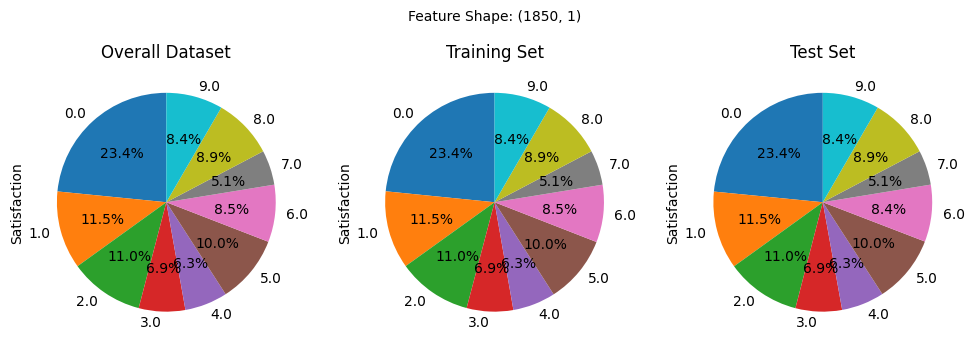

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


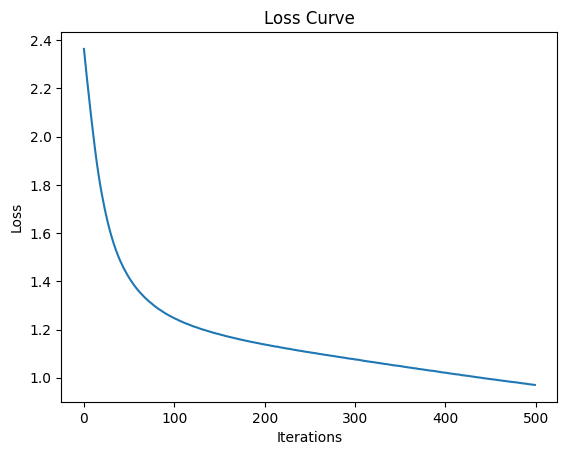

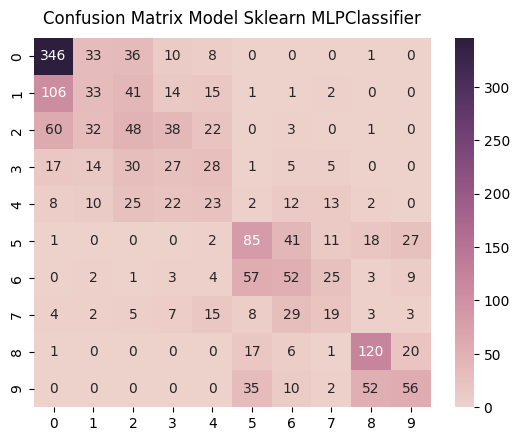

              precision    recall  f1-score      support
0.0            0.637201  0.797235  0.708291   434.000000
1.0            0.261905  0.154930  0.194690   213.000000
2.0            0.258065  0.235294  0.246154   204.000000
3.0            0.223140  0.212598  0.217742   127.000000
4.0            0.196581  0.196581  0.196581   117.000000
5.0            0.412621  0.459459  0.434783   185.000000
6.0            0.327044  0.333333  0.330159   156.000000
7.0            0.243590  0.200000  0.219653    95.000000
8.0            0.600000  0.727273  0.657534   165.000000
9.0            0.486957  0.361290  0.414815   155.000000
accuracy       0.437061  0.437061  0.437061     0.437061
macro avg      0.364710  0.367799  0.362040  1851.000000
weighted avg   0.411285  0.437061  0.418872  1851.000000
Mean Squared Error:  2.703943814154511


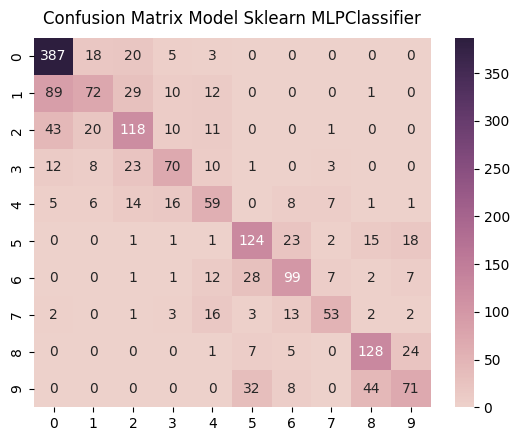

              precision    recall  f1-score      support
0.0            0.719331  0.893764  0.797116   433.000000
1.0            0.580645  0.338028  0.427300   213.000000
2.0            0.570048  0.581281  0.575610   203.000000
3.0            0.603448  0.551181  0.576132   127.000000
4.0            0.472000  0.504274  0.487603   117.000000
5.0            0.635897  0.670270  0.652632   185.000000
6.0            0.634615  0.630573  0.632588   157.000000
7.0            0.726027  0.557895  0.630952    95.000000
8.0            0.663212  0.775758  0.715084   165.000000
9.0            0.577236  0.458065  0.510791   155.000000
accuracy       0.638378  0.638378  0.638378     0.638378
macro avg      0.618246  0.596109  0.600581  1850.000000
weighted avg   0.631286  0.638378  0.627237  1850.000000
Mean Squared Error:  1.6713513513513514


In [26]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)
    s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
    s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

    sorted_train = s_train['Satisfaction'].value_counts().sort_index()
    sorted_test = s_test['Satisfaction'].value_counts().sort_index()
    sorted_data = data['Satisfaction'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    #! edit mulai disini
    mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=500, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
    mlp.fit(x_train, y_train)
    #! sampe sini

    plt.plot(mlp.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    predict = mlp.predict(x_test)
    confussion_matrix = confusion_matrix(y_test, predict)
    plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

    model1_report = classification_report(y_test, predict, output_dict=True)
    print(pd.DataFrame(model1_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_test, predict))

    predict = mlp.predict(x_train)
    confusion_matrix_result = confusion_matrix(y_train, predict)
    plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

    model_report = classification_report(y_train, predict, output_dict=True)
    print(pd.DataFrame(model_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_train, predict))



## Epoch 1000

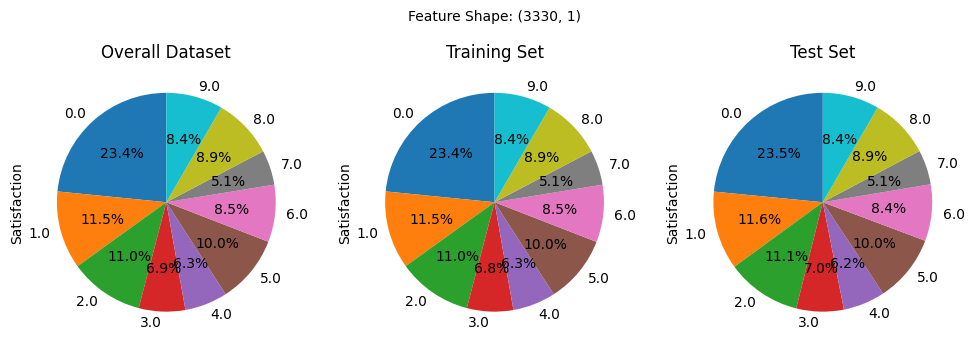

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


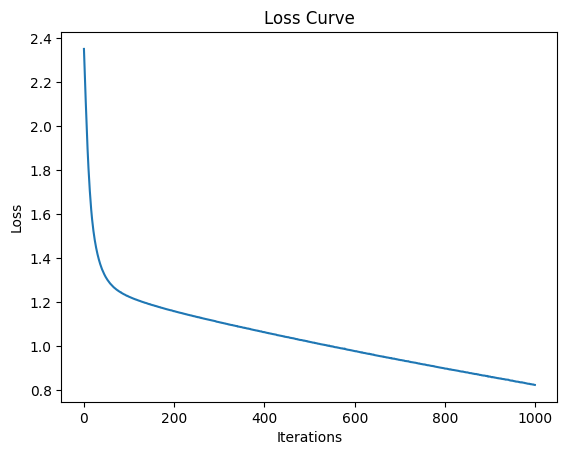

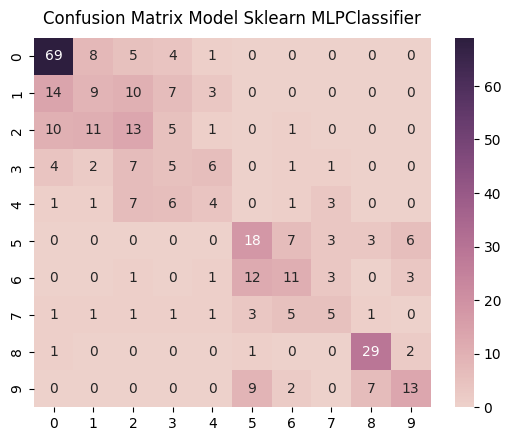

              precision    recall  f1-score     support
0.0            0.690000  0.793103  0.737968   87.000000
1.0            0.281250  0.209302  0.240000   43.000000
2.0            0.295455  0.317073  0.305882   41.000000
3.0            0.178571  0.192308  0.185185   26.000000
4.0            0.235294  0.173913  0.200000   23.000000
5.0            0.418605  0.486486  0.450000   37.000000
6.0            0.392857  0.354839  0.372881   31.000000
7.0            0.333333  0.263158  0.294118   19.000000
8.0            0.725000  0.878788  0.794521   33.000000
9.0            0.541667  0.419355  0.472727   31.000000
accuracy       0.474394  0.474394  0.474394    0.474394
macro avg      0.409203  0.408833  0.405328  371.000000
weighted avg   0.455550  0.474394  0.461322  371.000000
Mean Squared Error:  2.7169811320754715


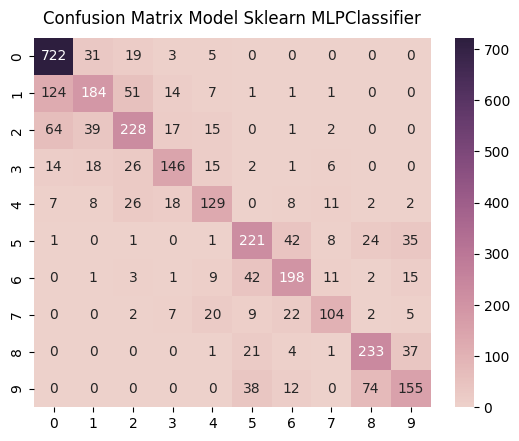

              precision    recall  f1-score      support
0.0            0.774678  0.925641  0.843458   780.000000
1.0            0.654804  0.480418  0.554217   383.000000
2.0            0.640449  0.622951  0.631579   366.000000
3.0            0.708738  0.640351  0.672811   228.000000
4.0            0.638614  0.611374  0.624697   211.000000
5.0            0.661677  0.663664  0.662669   333.000000
6.0            0.685121  0.702128  0.693520   282.000000
7.0            0.722222  0.608187  0.660317   171.000000
8.0            0.691395  0.784512  0.735016   297.000000
9.0            0.622490  0.555556  0.587121   279.000000
accuracy       0.696697  0.696697  0.696697     0.696697
macro avg      0.680019  0.659478  0.666541  3330.000000
weighted avg   0.691245  0.696697  0.690028  3330.000000
Mean Squared Error:  1.3705705705705706


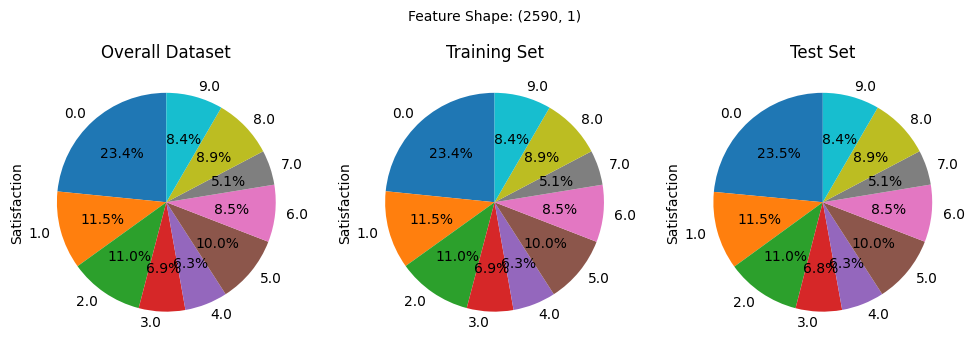

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


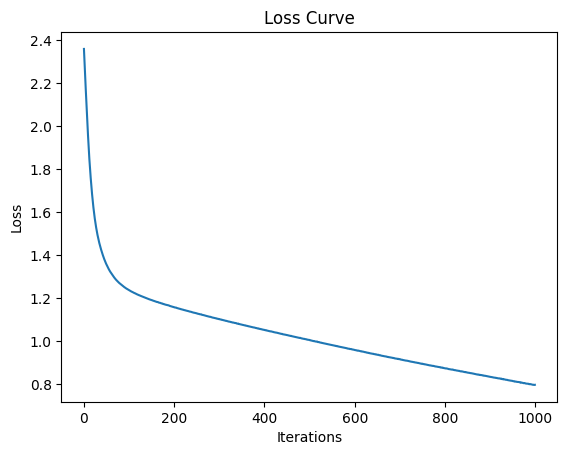

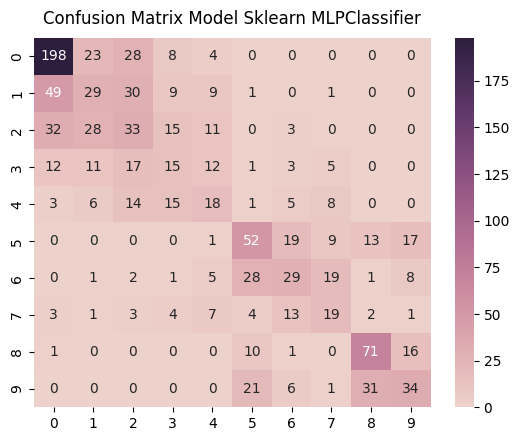

              precision    recall  f1-score      support
0.0            0.664430  0.758621  0.708408   261.000000
1.0            0.292929  0.226562  0.255507   128.000000
2.0            0.259843  0.270492  0.265060   122.000000
3.0            0.223881  0.197368  0.209790    76.000000
4.0            0.268657  0.257143  0.262774    70.000000
5.0            0.440678  0.468468  0.454148   111.000000
6.0            0.367089  0.308511  0.335260    94.000000
7.0            0.306452  0.333333  0.319328    57.000000
8.0            0.601695  0.717172  0.654378    99.000000
9.0            0.447368  0.365591  0.402367    93.000000
accuracy       0.448245  0.448245  0.448245     0.448245
macro avg      0.387302  0.390326  0.386702  1111.000000
weighted avg   0.432489  0.448245  0.437988  1111.000000
Mean Squared Error:  2.711971197119712


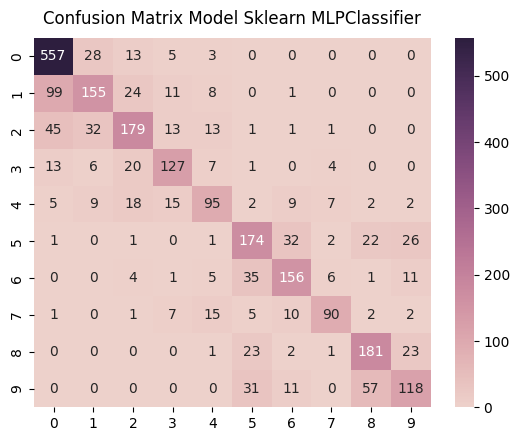

              precision    recall  f1-score      support
0.0            0.772538  0.919142  0.839488   606.000000
1.0            0.673913  0.520134  0.587121   298.000000
2.0            0.688462  0.628070  0.656881   285.000000
3.0            0.709497  0.713483  0.711485   178.000000
4.0            0.641892  0.579268  0.608974   164.000000
5.0            0.639706  0.671815  0.655367   259.000000
6.0            0.702703  0.712329  0.707483   219.000000
7.0            0.810811  0.676692  0.737705   133.000000
8.0            0.683019  0.783550  0.729839   231.000000
9.0            0.648352  0.543779  0.591479   217.000000
accuracy       0.707336  0.707336  0.707336     0.707336
macro avg      0.697089  0.674826  0.682582  2590.000000
weighted avg   0.703722  0.707336  0.701605  2590.000000
Mean Squared Error:  1.3996138996138996


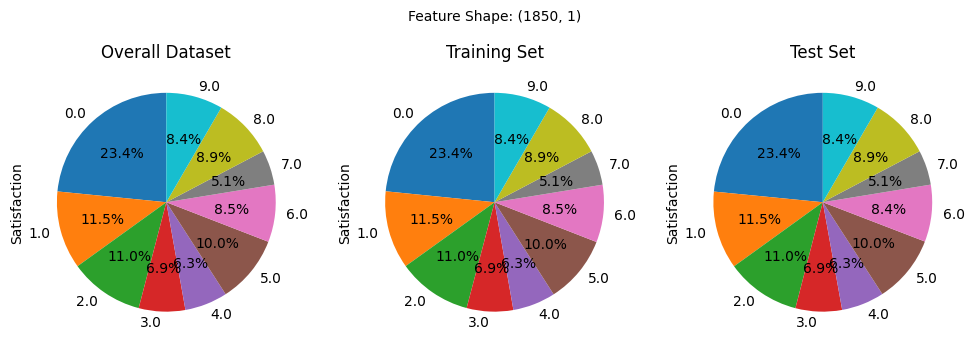

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


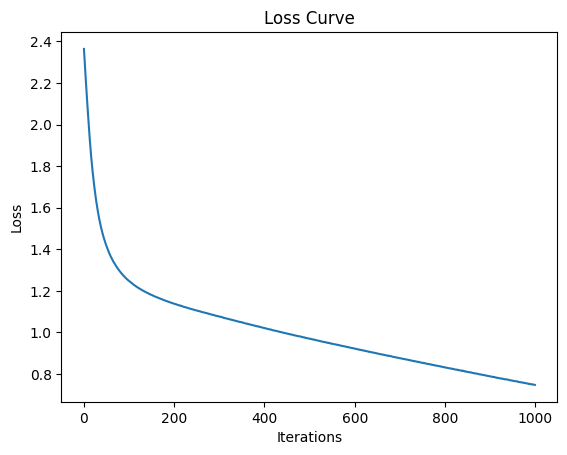

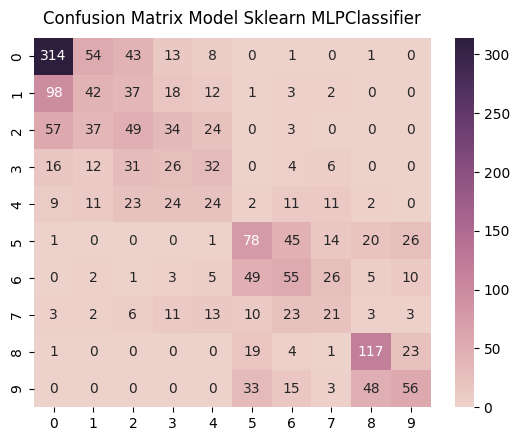

              precision    recall  f1-score      support
0.0            0.629259  0.723502  0.673098   434.000000
1.0            0.262500  0.197183  0.225201   213.000000
2.0            0.257895  0.240196  0.248731   204.000000
3.0            0.201550  0.204724  0.203125   127.000000
4.0            0.201681  0.205128  0.203390   117.000000
5.0            0.406250  0.421622  0.413793   185.000000
6.0            0.335366  0.352564  0.343750   156.000000
7.0            0.250000  0.221053  0.234637    95.000000
8.0            0.596939  0.709091  0.648199   165.000000
9.0            0.474576  0.361290  0.410256   155.000000
accuracy       0.422474  0.422474  0.422474     0.422474
macro avg      0.361602  0.363635  0.360418  1851.000000
weighted avg   0.407397  0.422474  0.412446  1851.000000
Mean Squared Error:  2.795245813074014


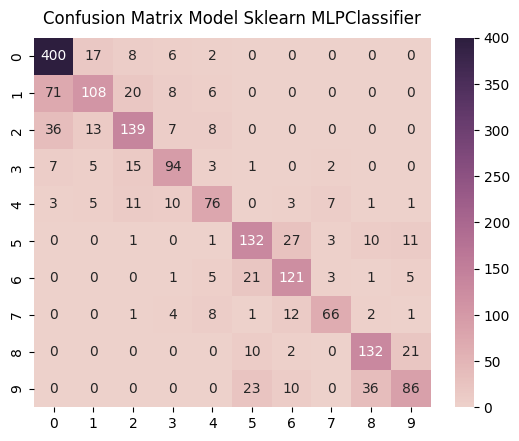

              precision    recall  f1-score      support
0.0            0.773694  0.923788  0.842105   433.000000
1.0            0.729730  0.507042  0.598338   213.000000
2.0            0.712821  0.684729  0.698492   203.000000
3.0            0.723077  0.740157  0.731518   127.000000
4.0            0.697248  0.649573  0.672566   117.000000
5.0            0.702128  0.713514  0.707775   185.000000
6.0            0.691429  0.770701  0.728916   157.000000
7.0            0.814815  0.694737  0.750000    95.000000
8.0            0.725275  0.800000  0.760807   165.000000
9.0            0.688000  0.554839  0.614286   155.000000
accuracy       0.731892  0.731892  0.731892     0.731892
macro avg      0.725822  0.703908  0.710480  1850.000000
weighted avg   0.730118  0.731892  0.725859  1850.000000
Mean Squared Error:  1.1464864864864865


In [27]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)
    s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
    s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

    sorted_train = s_train['Satisfaction'].value_counts().sort_index()
    sorted_test = s_test['Satisfaction'].value_counts().sort_index()
    sorted_data = data['Satisfaction'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    #! edit mulai disini
    mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=1000, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
    mlp.fit(x_train, y_train)
    #! sampe sini

    plt.plot(mlp.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    predict = mlp.predict(x_test)
    confussion_matrix = confusion_matrix(y_test, predict)
    plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

    model1_report = classification_report(y_test, predict, output_dict=True)
    print(pd.DataFrame(model1_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_test, predict))

    predict = mlp.predict(x_train)
    confusion_matrix_result = confusion_matrix(y_train, predict)
    plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

    model_report = classification_report(y_train, predict, output_dict=True)
    print(pd.DataFrame(model_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_train, predict))

